### import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np

In [2]:
may = pd.read_pickle('../data/may.pkl')
#maytrip = pd.read_csv('../data/may_trip.csv')

In [3]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [4]:
may.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5


In [5]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.1+ GB


#note - the entries and the index numbers are different because we removed bicycles from our dataset.  difference of 8920 entries, there's 8921 bicycles in the csv.

#i wonder how many individual scooters are in this dataset

In [6]:
may['sumdid'].value_counts() 

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
Powered3361332             1
Powered6599831             1
PoweredYEBSU               1
Powered1PKP7               1
PoweredCI6VKIK2KOFMC       1
Name: sumdid, Length: 8303, dtype: int64

#there's 8303 scooters across 20,283,582 rows of data
that's almost 2443 entries per scooter ... which i can see is not true.
max is 8921, min is 1

i wonder if there's a difference across companies as to how many times each scooter is entered
there's 7 companies - is SHOULD be something like 2,897,654 entries for each business if the distribution is equal

In [7]:
may['companyname'].value_counts()

3    7111655
0    4334006
1    3112581
5    2984630
4    1301001
2     915314
6     524395
Name: companyname, dtype: int64

the data is NOT equal
company 3 has a lot more info than anyone else
companies 1 and 5 are right about where i predicted
companies 0 and 4 are a little above and below
companies 2 and 6 are way underreported compared to the other 5.

In [8]:
may.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
dtype: int64

In [9]:
may.loc[may['sumdid'] == 'PoweredLIRL1']
#company0 = may.loc[may['sumdid'] == 'PoweredLIRL1']
#note: Jeremiah's query to look at how often a scooter is pinged.  this one is every 5 mins

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,0
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,0
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,0
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,0
...,...,...,...,...,...,...
20209588,2019-05-31 22:00:15.960,36.191117,-86.781360,PoweredLIRL1,53.0,0
20213207,2019-05-31 22:05:16.080,36.191117,-86.781360,PoweredLIRL1,53.0,0
20216631,2019-05-31 22:10:16.483,36.191096,-86.781369,PoweredLIRL1,53.0,0
20220463,2019-05-31 22:15:16.653,36.191096,-86.781369,PoweredLIRL1,53.0,0


so one of the scooters that had only 1 entry ... 

In [10]:
may.loc[may['sumdid']== 'Powered1PKP7']

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
16270541,2019-05-27 21:46:35.653,36.176051,-86.76609,Powered1PKP7,82.0,0


same company ... interesting.

let me try and find out how many scooters each of these companies have.  
I know there's 8303 scooters and 7 companies.

In [11]:
may_company_group = may.groupby("companyname")

In [12]:
may_scooter_company = may_company_group.agg({"sumdid": "nunique"})

In [13]:
print(may_scooter_company)

             sumdid
companyname        
0              3064
1              1376
2               223
3              1631
4               687
5               976
6               346


it worked!  
so, there's a definite leader in company 0.  
company 1 and 3 are close for positions 2 and 3.  
company 4 and 5 are fairly modest.
and company 2 and 6 barely have any scooters

 ... i wonder if there's a company trend for those null chargelevels?
 what do the charge levels even look like?

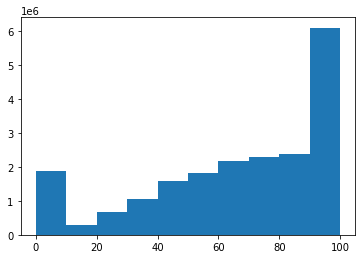

In [14]:
plt.hist("chargelevel", bins = 10, data = may);

In [15]:
may_nullcharge_company= may.chargelevel.isnull().groupby(may.companyname).sum()
print(may_nullcharge_company)

companyname
0      0
1      0
2      0
3      0
4    283
5      0
6      0
Name: chargelevel, dtype: int64


bingo - all 283 null values are in the same company, company 4.  which was a modest sized company with 687 scooters.  I'm not sure yet what that means, but something's going on there.

i wonder about the number of unique id scooter entries - those that have just one entry, is there a pattern there as well?

In [16]:
may.groupby("sumdid").filter(lambda x: len(x) == 1)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
62,2019-05-01 00:01:41.247,36.161052,-86.781899,PoweredYEBSU,73.0,0
4272949,2019-05-09 23:03:18.997,36.134312,-86.667562,PoweredCI6VKIK2KOFMC,6.0,3
4326724,2019-05-10 02:13:10.420,36.164273,-86.769398,Powered523737,100.0,1
7520973,2019-05-16 16:18:48.717,36.141950,-86.789444,Powered3361332,0.0,4
7908151,2019-05-17 05:45:01.127,36.161862,-86.774241,PoweredN4YI2A7RXZQLY,54.0,3
9656375,2019-05-19 23:57:38.663,36.162614,-86.776840,PoweredGJYGPDVTFXRH7,78.0,3
10331574,2019-05-21 01:53:37.427,36.176371,-86.804886,PoweredCW742BQMJ3XHN,0.0,3
14738928,2019-05-26 03:17:34.450,36.153148,-86.793122,Powered8019965,100.0,4
16270541,2019-05-27 21:46:35.653,36.176051,-86.766090,Powered1PKP7,82.0,0
19207378,2019-05-30 22:07:00.887,36.147729,-86.740345,Powered6599831,71.0,4


well, there's not as many as i thought there might be - just 10, 
and company 3 has 4 of them, while company 4 has 3 of them.  No real insights here ... 

dates all over the place.  chargelevels all over.  all in different places.  i see no pattern with these single entry scooters.  and given that it's 10 out of 8300 ... not significant.

I think I'm going to need to be able to look at this data by specific dates and specific times.  I need to break down that datetime column into something more usable for me.

In [17]:
may['dates'] = pd.to_datetime(may['pubdatetime']).dt.date
may['times'] = pd.to_datetime(may['pubdatetime']).dt.time

In [18]:
#may.head()

that worked great!  let me try looking at a single day and see what i've got

In [19]:
#may.loc[may["dates"]== "2019-05-01"]

... that didn't work?  why not?  

In [20]:
#may.info()

In [21]:
#may_dates = may.agg({"dates": "nunique"})

In [22]:
#print(may_dates)

In [23]:
#may["dates"].unique()

Ah!  there's the problem!  how do i fix THAT?  can i convert it to a string?  it's not a datetime object ... just an object.  what even is this thing?  I need to do some research on datetimes i think ... 

In [24]:
may[(may['pubdatetime'] > '2019-05-01 0:00:00') & (may['pubdatetime'] < '2019-05-01 23:59:42.000')]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,2019-05-01,00:01:41.247000
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,2019-05-01,00:01:41.247000
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,2019-05-01,00:01:41.247000
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,2019-05-01,00:01:41.247000
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,2019-05-01,00:01:41.247000
...,...,...,...,...,...,...,...,...
568925,2019-05-01 23:59:40.990,36.154100,-86.784660,Powered049255,78.0,1,2019-05-01,23:59:40.990000
568926,2019-05-01 23:59:41.053,36.160539,-86.778321,Powered594213,81.0,1,2019-05-01,23:59:41.053000
568927,2019-05-01 23:59:41.610,36.133136,-86.818130,Powered341619,46.0,1,2019-05-01,23:59:41.610000
568928,2019-05-01 23:59:41.667,36.160070,-86.776666,Powered542423,38.0,1,2019-05-01,23:59:41.667000


okay - well, that did SOMETHING, but since we're thinking we need to focus specifically on commuter times ... i think i still need to get those dates and times columns to work ... 

so ... datetime objects are a thing.  they exist for a reason.  seems pretty basic.  there's got to be a way to make them useable.  i don't know that converting them to a string is the right path.  i should be able to make use of them as they are.  i just don't understand what they are to be able to do that ... yet

In [25]:
may.loc[may["dates"]== datetime.date(2019, 5, 1)]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,2019-05-01,00:01:41.247000
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,2019-05-01,00:01:41.247000
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,2019-05-01,00:01:41.247000
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,2019-05-01,00:01:41.247000
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,2019-05-01,00:01:41.247000
...,...,...,...,...,...,...,...,...
569066,2019-05-01 23:59:59.643,36.163914,-86.769393,Powered875414,86.0,1,2019-05-01,23:59:59.643000
569067,2019-05-01 23:59:59.833,36.163933,-86.769403,Powered486289,89.0,1,2019-05-01,23:59:59.833000
569068,2019-05-01 23:59:59.947,36.154740,-86.784968,Powered583191,57.0,1,2019-05-01,23:59:59.947000
569069,2019-05-01 23:59:59.983,36.122224,-86.779943,Powered786553,84.0,1,2019-05-01,23:59:59.983000


In [26]:
#may.loc[may["pubdatetime"]==datetime.date("2019,05,01")]

okay!  that worked!  and it worked on the dates column, but not the pubdatetime column ... i'm guessing because the date is still attached to a time in that column, making it unsearchable that way.

does this translate to the times column?  can i look for a specific time across all the rows?

In [27]:
#may.loc[may["times"]==datetime.time("00:01:41.247000")]
#note - code here does not work.  need to convert it to something else ... ?

In [28]:
may['hours'] = pd.to_datetime(may['pubdatetime']).dt.hour

In [29]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,2019-05-01,00:01:41.247000,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,2019-05-01,00:01:41.247000,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,2019-05-01,00:01:41.247000,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,2019-05-01,00:01:41.247000,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,2019-05-01,00:01:41.247000,0


In [30]:
may.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5,2019-05-31,23:59:42,23
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5,2019-05-31,23:59:42,23
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5,2019-05-31,23:59:42,23
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5,2019-05-31,23:59:42,23
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5,2019-05-31,23:59:42,23


In [31]:
may.loc[may["hours"]==(7)]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,2019-05-01,07:00:03.897000,7
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,2019-05-01,07:00:03.897000,7
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,2019-05-01,07:00:03.897000,7
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,2019-05-01,07:00:03.897000,7
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,2019-05-01,07:00:03.897000,7
...,...,...,...,...,...,...,...,...,...
19605697,2019-05-31 07:59:42.000,36.153000,-86.795300,Powerede980446c-be26-54ef-aa91-1b723da8855d,52.0,5,2019-05-31,07:59:42,7
19605698,2019-05-31 07:59:42.000,36.119700,-86.753000,Powered1bf0d1c6-a03f-5257-a6a2-f077adc42537,0.0,5,2019-05-31,07:59:42,7
19605699,2019-05-31 07:59:42.000,36.174200,-86.790500,Poweredde5a4ca9-6e8a-5b3f-b8ec-3b97b36a54f2,85.0,5,2019-05-31,07:59:42,7
19605700,2019-05-31 07:59:42.000,36.120100,-86.753400,Poweredfe2bc4e4-5fd7-56c1-8e30-e752cf8316d7,0.0,5,2019-05-31,07:59:42,7


In [32]:
may.loc[(may['hours'] > 6) & (may['hours'] < 10)]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,2019-05-01,07:00:03.897000,7
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,2019-05-01,07:00:03.897000,7
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,2019-05-01,07:00:03.897000,7
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,2019-05-01,07:00:03.897000,7
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,2019-05-01,07:00:03.897000,7
...,...,...,...,...,...,...,...,...,...
19670960,2019-05-31 09:59:46.510,36.177697,-86.777695,PoweredZYASW,83.0,0,2019-05-31,09:59:46.510000,9
19670961,2019-05-31 09:59:46.510,36.154415,-86.779239,Powered5ZVXC,100.0,0,2019-05-31,09:59:46.510000,9
19670962,2019-05-31 09:59:46.510,36.180934,-86.749486,Powered72PTV,96.0,0,2019-05-31,09:59:46.510000,9
19670963,2019-05-31 09:59:46.510,36.171303,-86.752101,PoweredYFN3B,100.0,0,2019-05-31,09:59:46.510000,9


Okay!  so, i have a dates column that i can filter on to find all data for a specific date - useful!

and i have an hours column that i can filter on for a specific hour-wide window, or a range of hours - also useful!  

#NOW TO LOOK AT THE DATA OF THE TRIPS DF

In [33]:
#maytrip.head()

In [34]:
#maytrip.tail()

In [35]:
#maytrip.info()

Hmmm ... i'm not sure just now what to do with this.  But, i think it should be possible to merge it with the other one?  which one would be left though?  and do i really need to do that?

if i do ... it would probably be useful to me to convert the company names to the same numbers to start with.  That way there's any hope of the two dfs talking with one another ... 

In [36]:
#maytrip.companyName.unique()

In [37]:
#company_dict = {'Bird':0, 'Lyft': 1, 'Gotcha': 2, 'Lime': 3, 'SPIN': 4, 'JUMP': 5, 'Bolt Mobility': 6}

In [38]:
#maytrip.companyName = maytrip.companyName.replace(company_dict)

In [39]:
#maytrip.head()

the variations on the column titles is going to be annoying to me too.  let's get these to match the ones in may

In [40]:
#may.columns

In [41]:
#maytrip.columns

In [42]:
#maytrip = maytrip.rename(columns={'pubTimeStamp':'pubdatetime', 'companyName':'companyname', 'tripRecordNum':'tripnum', 'sumdID':'sumdid','tripDuration':'tripduration', 'tripDistance':'tripdistance', 'startDate':'startdate', 'startTime':'starttime', 'endDate':'enddate', 'endTime':'endtime', 'startLatitude':'startlat', 'startLongitude':'startlong', 'endLatitude':'endlat', 'endLongitude':'endlong', 'tripRoute':'triproute'})

In [43]:
#maytrip.head()

better!  also, i'm betting it will be useful here too to be able to search for things by date or time, given the commute focus we're aiming for

In [44]:
'''maytrip.pubdatetime = pd.to_datetime(maytrip.pubdatetime)
maytrip['dates'] = pd.to_datetime(maytrip['pubdatetime']).dt.date
maytrip['times'] = pd.to_datetime(maytrip['pubdatetime']).dt.time
maytrip['hours'] = pd.to_datetime(maytrip['pubdatetime']).dt.hour
maytrip.head()'''

"maytrip.pubdatetime = pd.to_datetime(maytrip.pubdatetime)\nmaytrip['dates'] = pd.to_datetime(maytrip['pubdatetime']).dt.date\nmaytrip['times'] = pd.to_datetime(maytrip['pubdatetime']).dt.time\nmaytrip['hours'] = pd.to_datetime(maytrip['pubdatetime']).dt.hour\nmaytrip.head()"

In [45]:
#maytrip.info()

now, the readme suggests that there may be some trips here of very short distance or very long duration, and that we should remove them.  duration first - anything of less than one minute or more than 24 hours.  they need to be removed.  

the column is listed in rounded hours that the trip lasted

In [46]:
#maytrip[(maytrip['tripduration'] > 24.0)]

In [47]:
#maytrip.sort_values("tripduration")

In [48]:
#maytrip[(maytrip['tripduration'] <= 0.01)]

... now i'm wondering if i even need to take these rows out.  doing that is to make the df smaller and faster to work with, but this is already small

In [49]:
#maytrip.loc[(maytrip['starttime'] >= "06:59:59.000000") & (maytrip['endtime'] <= "10:00:00.000000")]

... that did not do what i was hoping it would do.  need to try something else ... 

i need a start time between time_a and time_b and an end time between time_a and time_b.  not greaterthan/lessthan/equalto 


#OKAY - BREAKING THIS PROJECT UP.  I AM LOOKING TO FIND SCOOTERS THAT HAVE BEEN ABANDONED.  SCOOTERS THAT ARE SITTING IN THE SAME PLACE FOR A LONG TIME, LOSING A CHARGE, NOT BEING USED.

FIRST STEP - FINDING SCOOTERS THAT AREN'T MOVING.  UNIQUE SUMDID, LOCATION UNCHANGED.  A FOR-LOOP SHOULD DO IT I THINK?

first , i'm going to sort my data.  all the individual scooters together, then sorted by datetime

In [50]:
maysorted = may.sort_values(['sumdid', 'pubdatetime'])

In [51]:
maysorted.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
12757337,2019-05-24 00:04:42,36.161549,-86.775012,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,6,2019-05-24,00:04:42,0
12761150,2019-05-24 00:09:42,36.161505,-86.775087,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,6,2019-05-24,00:09:42,0
12765093,2019-05-24 00:14:42,36.161555,-86.775050,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,6,2019-05-24,00:14:42,0
12769113,2019-05-24 00:19:42,36.161609,-86.775016,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,6,2019-05-24,00:19:42,0
12773048,2019-05-24 00:24:43,36.161596,-86.775033,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.0,6,2019-05-24,00:24:43,0


now, i'm trying to find movement in the scooter.  i think i can find this with just one of the location columns.  going to try with latitude, just because the # is positive instead of negative ... 

just "shift" gave me a number, but using math - i get movement!  "0.0" = standing still!  

In [52]:
maysorted['latmovement'] = (maysorted.latitude.shift() - maysorted.latitude)

In [53]:
maysorted.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours,latmovement
20275424,2019-05-31 23:35:13,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:35:13,23,0.0
20279019,2019-05-31 23:40:13,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:40:13,23,0.0
20282194,2019-05-31 23:45:12,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:45:12,23,0.0
20286222,2019-05-31 23:50:12,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:50:12,23,0.0
20289583,2019-05-31 23:55:12,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:55:12,23,0.0


In [54]:
may_stationaryscooter= maysorted[maysorted['latmovement']==0.0]

In [55]:
may_stationaryscooter.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours,latmovement
12803829,2019-05-24 01:04:44,36.161594,-86.775060,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-24,01:04:44,1,0.0
12909756,2019-05-24 03:34:51,36.161485,-86.775018,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-24,03:34:51,3,0.0
13037674,2019-05-24 07:15:00,36.216279,-86.729816,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,67.43,6,2019-05-24,07:15:00,7,0.0
13040512,2019-05-24 07:20:00,36.216279,-86.729816,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,68.41,6,2019-05-24,07:20:00,7,0.0
13045802,2019-05-24 07:30:00,36.216276,-86.729803,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,69.98,6,2019-05-24,07:30:00,7,0.0


okay!  part of the way there!  i have those that aren't moving via latitude - but I still see that the very first row is still moving via longitude.  so ... repeat and take those out too?  

In [56]:
may_stationaryscooter['lonmovement'] = (may_stationaryscooter.longitude.shift() - may_stationaryscooter.longitude)

<ipython-input-56-7da0dedf9d04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_stationaryscooter['lonmovement'] = (may_stationaryscooter.longitude.shift() - may_stationaryscooter.longitude)


In [57]:
may_stationaryscooter.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours,latmovement,lonmovement
12803829,2019-05-24 01:04:44,36.161594,-86.775060,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-24,01:04:44,1,0.0,NaN
12909756,2019-05-24 03:34:51,36.161485,-86.775018,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-24,03:34:51,3,0.0,-0.000042
13037674,2019-05-24 07:15:00,36.216279,-86.729816,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,67.43,6,2019-05-24,07:15:00,7,0.0,-0.045202
13040512,2019-05-24 07:20:00,36.216279,-86.729816,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,68.41,6,2019-05-24,07:20:00,7,0.0,0.000000
13045802,2019-05-24 07:30:00,36.216276,-86.729803,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,69.98,6,2019-05-24,07:30:00,7,0.0,-0.000013


In [58]:
may_stationaryscooter = may_stationaryscooter[may_stationaryscooter['lonmovement']==0.0]

In [59]:
may_stationaryscooter.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours,latmovement,lonmovement
20275424,2019-05-31 23:35:13,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:35:13,23,0.0,0.0
20279019,2019-05-31 23:40:13,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:40:13,23,0.0,0.0
20282194,2019-05-31 23:45:12,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:45:12,23,0.0,0.0
20286222,2019-05-31 23:50:12,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:50:12,23,0.0,0.0
20289583,2019-05-31 23:55:12,36.1706,-86.7806,Poweredffdcc0c3-1db8-58e2-a876-036bbad5db5d,66.0,5,2019-05-31,23:55:12,23,0.0,0.0


In [60]:
may_stationaryscooter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8755359 entries, 13040512 to 20289583
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
 6   dates        object        
 7   times        object        
 8   hours        int64         
 9   latmovement  float64       
 10  lonmovement  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 801.6+ MB


okay!  that worked!  I have 8.7million rows now of stationary scooters.  

so - what i'm looking for first is those that stay still for a long time.  if it's only for a few minutes, then maybe it's a crosswalk or something.  or it takes a bit for someone new to check it out.  

let's look for scooters that stay put for longer than half an hour
first, i think i need a column that calculates the time differential between rows, that way i have something i can count

In [61]:
#minimay_stationaryscooter = may_stationaryscooter[:10000]

In [62]:
#minimay_stationaryscooter.head(20)

#position = minimay_stationaryscooter.columns.get_loc('pubdatetime')
#minimay_stationaryscooter['elapsed'] = minimay_stationaryscooter.iloc[1:,position] - minimay_stationaryscooter.iat[0,position]

# i tried this first - didn't work.  tried shift again - and this time it worked.

In [63]:
#minimay_stationaryscooter['timeshift']= (minimay_stationaryscooter.pubdatetime - minimay_stationaryscooter.pubdatetime.shift())

In [64]:
#minimay_stationaryscooter.head()

In [65]:
#minimay_stationaryscooter.info()

In [66]:
#minimay_stationaryscooter['timeshift'] = minimay_stationaryscooter['timeshift']/np.timedelta64(1, 's')

#this worked to give me a column that is in a form i can use

In [67]:
#minimay_stationaryscooter.head()

In [68]:
#minimay_stationaryscooter.info()

In [69]:
'''def duration(row): 
    if 240 <= row ['timeshift'] <= 360:
        return 5
    else:
        return 0

minimay_stationaryscooter['duration'] = minimay_stationaryscooter.apply(duration, axis = 1)'''

"def duration(row): \n    if 240 <= row ['timeshift'] <= 360:\n        return 5\n    else:\n        return 0\n\nminimay_stationaryscooter['duration'] = minimay_stationaryscooter.apply(duration, axis = 1)"

In [70]:
#minimay_stationaryscooter.head(10)

In [71]:
'''minimay_stationaryscooter['cumulative_sum'] = 0 # initializing column
previous_index = 0
time_duration = 0
for ind, row in minimay_stationaryscooter.iterrows():
    if row['duration'] ==5:
        time_duration += 5
        minimay_stationaryscooter.loc[ind,'cumulative_sum'] = time_duration
    else: 
        time_duration = 0'''

#this iterrow worked!  it gave me a computational column with time clusters of how long the scooter has 
#been in the same spot!  
#took about 3 seconds to run.  now to run on the larger df...

"minimay_stationaryscooter['cumulative_sum'] = 0 # initializing column\nprevious_index = 0\ntime_duration = 0\nfor ind, row in minimay_stationaryscooter.iterrows():\n    if row['duration'] ==5:\n        time_duration += 5\n        minimay_stationaryscooter.loc[ind,'cumulative_sum'] = time_duration\n    else: \n        time_duration = 0"

In [72]:
#minimay_stationaryscooter.head(20)

Okay!  Finally worked!  now to apply all this to the larger may_stationaryscooter df, and then to june/july as well

In [73]:
may_stationaryscooter['timeshift']= (may_stationaryscooter.pubdatetime - may_stationaryscooter.pubdatetime.shift())


In [74]:
may_stationaryscooter['timeshift'] = may_stationaryscooter['timeshift']/np.timedelta64(1, 's')

In [75]:
def duration(row): 
    if 240 <= row ['timeshift'] <= 360:
        return 5
    else:
        return 0

may_stationaryscooter['duration'] = may_stationaryscooter.apply(duration, axis = 1)

In [76]:
'''may_stationaryscooter['cumulative_sum'] = 0 # initializing column
iter_count = 1
time_duration = 0
for ind, row in may_stationaryscooter.iterrows():
    if row['duration'] ==5:
        time_duration += 5
        may_stationaryscooter.loc[ind,'cumulative_sum'] = time_duration
    else: 
        time_duration = 0
    if iter_count % 100000 == 0:
        print (f'completed iteration: {iter_count}')
    iter_count += 1'''
#this took forever - 2 hours in and not done.  so, breaking it apart, adding a progress print function, and trying again

"may_stationaryscooter['cumulative_sum'] = 0 # initializing column\niter_count = 1\ntime_duration = 0\nfor ind, row in may_stationaryscooter.iterrows():\n    if row['duration'] ==5:\n        time_duration += 5\n        may_stationaryscooter.loc[ind,'cumulative_sum'] = time_duration\n    else: \n        time_duration = 0\n    if iter_count % 100000 == 0:\n        print (f'completed iteration: {iter_count}')\n    iter_count += 1"

In [77]:
may_stationaryscooter = may_stationaryscooter.reset_index()

In [78]:
may_stationaryscooter.head(10)

,index,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours,latmovement,lonmovement,timeshift,duration
0,13040512,2019-05-24 07:20:00,36.216279,-86.729816,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,68.41,6,2019-05-24,07:20:00,7,0.0,0.0,NaN,0
1,16993465,2019-05-28 17:58:51,36.162549,-86.774197,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,17:58:51,17,0.0,0.0,383931.0,0
2,17126263,2019-05-28 20:53:56,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,20:53:56,20,0.0,0.0,10505.0,0
3,17130115,2019-05-28 20:58:56,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,20:58:56,20,0.0,0.0,300.0,5
4,17134009,2019-05-28 21:03:56,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:03:56,21,0.0,0.0,300.0,5
5,17137902,2019-05-28 21:08:56,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:08:56,21,0.0,0.0,300.0,5
6,17142018,2019-05-28 21:13:57,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:13:57,21,0.0,0.0,301.0,5
7,17145815,2019-05-28 21:18:57,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:18:57,21,0.0,0.0,300.0,5
8,17149849,2019-05-28 21:23:57,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:23:57,21,0.0,0.0,300.0,5
9,17153683,2019-05-28 21:29:19,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:29:19,21,0.0,0.0,322.0,5


In [79]:
mini_4may_stationaryscooter.iloc[1500000:1500020]

NameError: name 'mini_4may_stationaryscooter' is not defined

In [ ]:
mini_1may_stationaryscooter = may_stationaryscooter[:1999999]
mini_1may_stationaryscooter.info()

In [ ]:
mini_1amay_stationaryscooter = mini_1may_stationaryscooter[:500046]
mini_1amay_stationaryscooter.info()

In [ ]:
mini_1bmay_stationaryscooter = mini_1may_stationaryscooter[500047:1000042]
mini_1bmay_stationaryscooter.info()

In [ ]:
mini_1cmay_stationaryscooter = mini_1may_stationaryscooter[1000043:1500003]
mini_1cmay_stationaryscooter.info()

In [ ]:
mini_1dmay_stationaryscooter = mini_1may_stationaryscooter[1500004:]
mini_1dmay_stationaryscooter.info()

In [ ]:
mini_2may_stationaryscooter = may_stationaryscooter[2000000:4000011]
mini_2may_stationaryscooter.info()

In [ ]:
mini_2amay_stationaryscooter = mini_2may_stationaryscooter[:500015]
mini_2amay_stationaryscooter.info()

In [ ]:
mini_2bmay_stationaryscooter = mini_2may_stationaryscooter[500016:1001811]
mini_2bmay_stationaryscooter.info()

In [ ]:
mini_2cmay_stationaryscooter = mini_2may_stationaryscooter[1001812:1500003]
mini_2cmay_stationaryscooter.info()

In [ ]:
mini_2dmay_stationaryscooter = mini_2may_stationaryscooter[1500004:]
mini_2dmay_stationaryscooter.info()

In [ ]:
mini_3may_stationaryscooter = may_stationaryscooter[4000012:6000006]
mini_3may_stationaryscooter.info()

In [ ]:
mini_3amay_stationaryscooter = mini_3may_stationaryscooter[:500000]
mini_3amay_stationaryscooter.info()

In [ ]:
mini_3bmay_stationaryscooter = mini_3may_stationaryscooter[500000:1000001]
mini_3bmay_stationaryscooter.info()

In [ ]:
mini_3cmay_stationaryscooter = mini_3may_stationaryscooter[1000001:1500154]
mini_3cmay_stationaryscooter.info()

In [ ]:
mini_3dmay_stationaryscooter = mini_3may_stationaryscooter[1500154:]
mini_3dmay_stationaryscooter.info()

In [ ]:
mini_4may_stationaryscooter = may_stationaryscooter[6000006:8000039]
mini_4may_stationaryscooter.info()

In [ ]:
mini_5may_stationaryscooter = may_stationaryscooter[8000040:]
mini_5may_stationaryscooter.info()

In [ ]:
#trying again

'''mini_1may_stationaryscooter['cumulative_sum'] = 0 # initializing column
iter_count = 1
time_duration = 0
for ind, row in mini_1may_stationaryscooter.iterrows():
    if row['duration'] ==5:
        time_duration += 5
        mini_1may_stationaryscooter.loc[ind,'cumulative_sum'] = time_duration
    else: 
        time_duration = 0
    if iter_count % 100000 == 0:
        print (f'completed iteration: {iter_count}')
    iter_count += 1'''

#it worked!  Took my comp 6 hours to do it - but it worked.  

In [ ]:
'''mini_3dmay_stationaryscooter['cumulative_sum'] = 0 # initializing column
iter_count = 1
time_duration = 0
for ind, row in mini_3dmay_stationaryscooter.iterrows():
    if row['duration'] ==5:
        time_duration += 5
        mini_3dmay_stationaryscooter.loc[ind,'cumulative_sum'] = time_duration
    else: 
        time_duration = 0
    if iter_count % 100000 == 0:
        print (f'completed iteration: {iter_count}')
    iter_count += 1'''

In [ ]:
#mini_1may_stationaryscooter.to_csv()

#note - it says it ran this function - but i do not see the csv in my folder.  so ... ?  
# but given it's size - maybe it takes a while too.  it's using a lot of memory right now ...
#or maybe i can break it up and save it bit by bit?  i feel like that may crash everything, clearing 6 hours of work
#if it's still in the exporting process.  unsure what to do.  wait for morning and see if it arrives?  
#i'm concerned about opening a new notebook.  or trying to reexport this one.

#going to try breaking it up.  what's the worst that can happen?

In [ ]:
#mini_1may_stationaryscooter.info()

In [ ]:
#mini_1amay_stationaryscooter = mini_1may_stationaryscooter[:500000]
#mini_1amay_stationaryscooter.info()

#yup - tried to export and everything crashed saying "out of memory" ... so my fears were not unfounded.
i guess i'll check again in the morning and see if the first csv comes through or not.  if not ... ugh.  I may need to rerun this whole dang thing, 6 hours and all ... that is not a good option

In [ ]:
#mini_1amay_stationaryscooter.to_pickle("../data/mini_1a_may.pkl")

In [ ]:
#mini_1bmay_stationaryscooter.to_pickle("../data/mini_1b_may.pkl")

In [ ]:
#mini_1cmay_stationaryscooter.to_pickle("../data/mini_1c_may.pkl")

In [ ]:
#mini_1dmay_stationaryscooter.to_pickle("../data/mini_1d_may.pkl")

In [ ]:
#mini_2amay_stationaryscooter.to_pickle("../data/mini_2a_may.pkl")

In [ ]:
#mini_2bmay_stationaryscooter.to_pickle("../data/mini_2b_may.pkl")

In [ ]:
#mini_2cmay_stationaryscooter.to_pickle("../data/mini_2c_may.pkl")

In [ ]:
#mini_2dmay_stationaryscooter.to_pickle("../data/mini_2d_may.pkl")

In [ ]:
#mini_3amay_stationaryscooter.to_pickle("../data/mini_3a_may.pkl")

In [ ]:
#mini_3bmay_stationaryscooter.to_pickle("../data/mini_3b_may.pkl")

In [ ]:
#mini_3cmay_stationaryscooter.to_pickle("../data/mini_3c_may.pkl")

In [ ]:
#mini_3dmay_stationaryscooter.to_pickle("../data/mini_3d_may.pkl")

So - after all that, my friend helped me find a code that may work better and faster than my working-but-taking-forever iterrows ... let's see:

In [ ]:
'''%%time
may_stationaryscooter['reset'] = np.where(may_stationaryscooter['duration'] == 0,1,0)
may_stationaryscooter['cumsum'] = may_stationaryscooter['reset'].cumsum()
may_stationaryscooter['cumulative_sum'] = may_stationaryscooter.groupby(['cumsum'])['duration'].cumsum()
may_stationaryscooter = may_stationaryscooter.drop(['reset','cumsum'],axis=1)'''

In [ ]:
#yeah, that didn't work nearly as well on mine as it did on theirs ... 

In [80]:
may_stationaryscooter.to_pickle("../data/may_stationaryscooter.pkl")